In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data set using pandas
df=pd.read_csv('C:/Users/Mandar/Documents/churn.csv')

In [3]:
# Checking shape of data
df.shape

(12335, 21)

In [4]:
# checking data set
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [149]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [151]:
# checking for NA's 
df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

In [5]:
# Removing variable with unique values
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.shape

(12335, 20)

In [7]:
# Labelencoding 
from sklearn.preprocessing import LabelEncoder

In [8]:
lab=LabelEncoder()

In [9]:
# Transforming characters into numbers
for i in df:
    if (df[i].dtypes in ['object']):
        df[[i]]=lab.fit_transform(df[[i]])

C:\Users\Mandar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Scaling of the data usig MIN MAX scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for val in df:
    if(df[val].dtypes in ['int64', 'float64']):
        df[[val]] = scaler.fit_transform(df[[val]])

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,0,0.0,1,1,0.140845,1,0,2,1,1,1,1,1,1,1,0,3,0.023383,0.024821,0
1,0,0.0,0,0,0.929577,0,1,0,0,0,2,2,2,2,0,1,1,0.349751,0.410841,0
2,0,0.0,1,0,0.816901,1,0,2,1,1,1,1,1,1,2,0,0,0.001493,0.119900,0
3,1,0.0,1,1,0.929577,1,2,2,1,1,1,1,1,1,2,0,3,0.080100,0.192719,0
4,0,0.0,0,0,0.140845,1,2,1,0,0,0,0,0,0,0,0,2,0.567164,0.100375,0


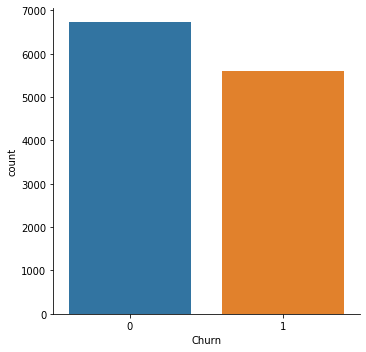

In [12]:
# CHecking class biasness (EDA)
sns.catplot(x="Churn", kind="count", data=df)

In [13]:
lst=[]
for val in df.SeniorCitizen:
    x=0 if (val<0.5) else 1
    lst.append(x)
df["SeniorCitizen"] = lst

In [163]:
df.Dependents.value_counts()

0    7974
1    4361
Name: Dependents, dtype: int64

In [14]:
x=df.iloc[:,0:19]

In [15]:
y=df.iloc[:,-1]

In [16]:
x.shape,y.shape

((12335, 19), (12335,))

In [17]:
# Sampling of the data 
from sklearn.model_selection import train_test_split

In [18]:
# Spliting into train test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.3)

In [22]:
# Importing metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
select = RandomForestClassifier(n_estimators=100, random_state=37)
select.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [47]:
pred=select.predict(x_test)

In [48]:
# Confusion matrix for model and class accuracy 
print(confusion_matrix(y_test,pred))

[[1875  155]
 [ 292 1379]]


In [49]:
cr=classification_report(y_test,pred)

In [50]:
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2030
           1       0.90      0.83      0.86      1671

    accuracy                           0.88      3701
   macro avg       0.88      0.87      0.88      3701
weighted avg       0.88      0.88      0.88      3701



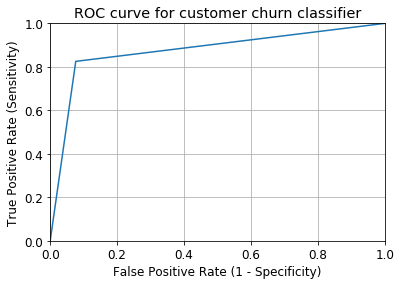

In [51]:
# Ploting AUROC 
fpr, tpr, thresholds = roc_curve(y_test,pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for customer churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [52]:
# ROC AUC score
roc_auc_score(y_test,pred)

0.8744498294581871